<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Found inside cloned repo

🔎 Preview of data:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0          

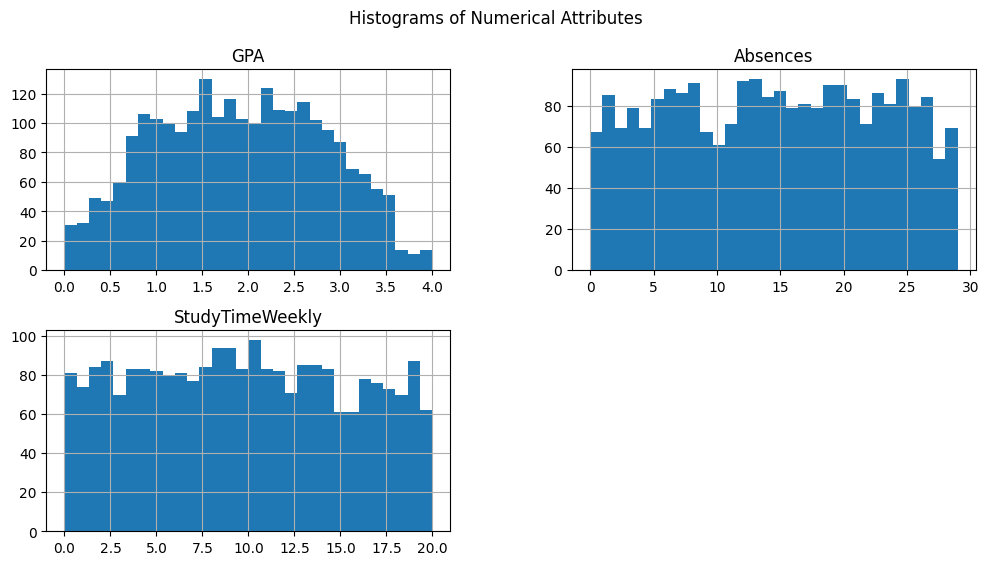

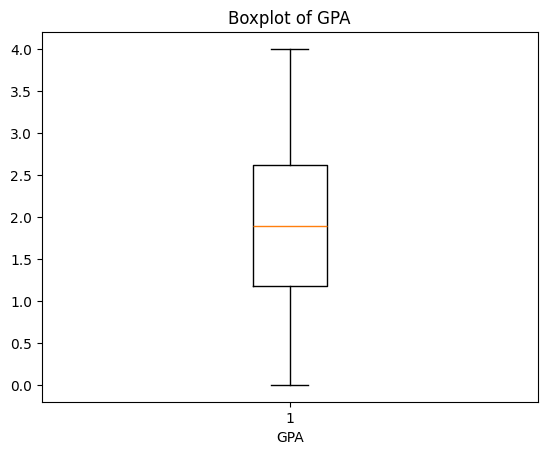

GPA: IQR lower=-0.996, upper=4.793, outliers=0


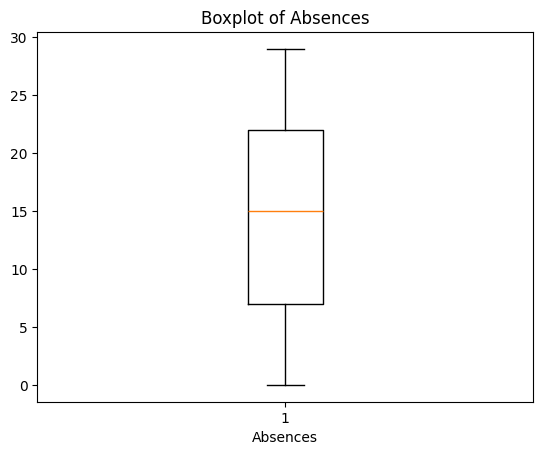

Absences: IQR lower=-15.500, upper=44.500, outliers=0


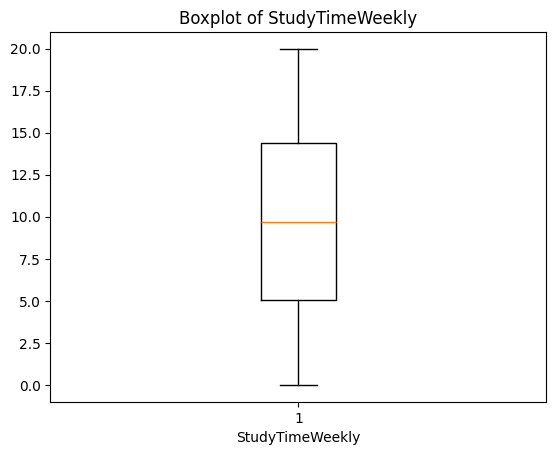

StudyTimeWeekly: IQR lower=-9.005, upper=28.456, outliers=0


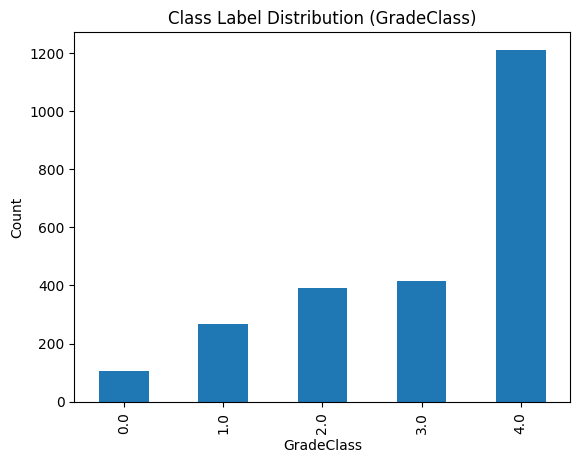

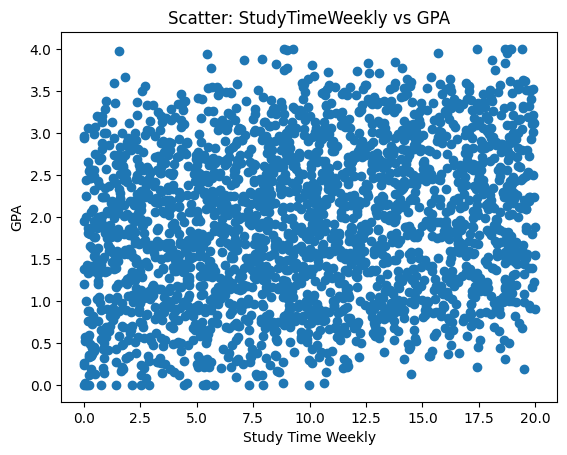

In [5]:
# === Cell 1: Setup & Load with auto-check ===
import os
import pandas as pd

# رابط المستودع على GitHub
repo_url = "https://github.com/lujainAziz/LujainAlmajyul-it326.git"
repo_name = "LujainAlmajyul-it326"
dataset_path = f"{repo_name}/Dataset/Raw_dataset.csv"

# 1) شيك إذا الملف موجود مباشرة في Colab
if os.path.exists("Dataset/Raw_dataset.csv"):
    print("✅ Found Dataset/Raw_dataset.csv")
    df = pd.read_csv("Dataset/Raw_dataset.csv")

# 2) إذا مو موجود، شيك إذا المستودع مستنسخ (cloned)
elif os.path.exists(dataset_path):
    print("✅ Found inside cloned repo")
    df = pd.read_csv(dataset_path)

# 3) إذا ما فيه نسخة، نعمل git clone ونقرأ الملف
else:
    print("📥 Cloning repository from GitHub...")
    !git clone {repo_url}
    if os.path.exists(dataset_path):
        df = pd.read_csv(dataset_path)
    else:
        raise FileNotFoundError("⚠️ ما لقيت Raw_dataset.csv لا محلي ولا في GitHub repo")

   #-------------------------------------------الكود الي فوق خاص بتحميل ملف الداتا بحيث ماتحصل مشاكل اثناء قراءه الملف----------------------------------------------------------

# عرض أول صفوف للتأكد
print("\n🔎 Preview of data:")
print(df.head())
print("\nShape:", df.shape)

# === Cell: Missing & Five-number summary ===
import numpy as np

# القيم المفقودة
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)
print("Any missing? ", df.isna().any().any())

# Five-number summary للأعمدة الرقمية فقط
num_cols = df.select_dtypes(include=[np.number]).columns
five_num = df[num_cols].describe(percentiles=[0.25,0.5,0.75]).T[['min','25%','50%','75%','max']]
print("\nFive-number summary:")
print(five_num)

# === Cell: Histograms ===
cols_to_hist = [c for c in ['GPA','Absences','StudyTimeWeekly'] if c in df.columns]
if cols_to_hist:
    df[cols_to_hist].hist(bins=30, figsize=(12,6))
    import matplotlib.pyplot as plt
    plt.suptitle("Histograms of Numerical Attributes")
    plt.show()
else:
    print("No target numeric columns found (GPA/Absences/StudyTimeWeekly).")

    # === Cell: Boxplots & Outliers ===
import matplotlib.pyplot as plt

def iqr_bounds(s, k=1.5):
    s = s.astype(float)
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

box_cols = [c for c in ['GPA','Absences','StudyTimeWeekly'] if c in df.columns]
for c in box_cols:
    plt.figure()
    plt.boxplot(df[c].dropna())
    plt.title(f"Boxplot of {c}")
    plt.xlabel(c)
    plt.show()

    lo, hi = iqr_bounds(df[c].dropna())
    outliers = ((df[c] < lo) | (df[c] > hi)).sum()
    print(f"{c}: IQR lower={lo:.3f}, upper={hi:.3f}, outliers={outliers}")

    # === Cell: Class Label Distribution ===
if 'GradeClass' in df.columns:
    import matplotlib.pyplot as plt
    counts = df['GradeClass'].value_counts().sort_index()
    plt.figure()
    counts.plot(kind='bar', title='Class Label Distribution (GradeClass)')
    plt.xlabel('GradeClass')
    plt.ylabel('Count')
    plt.show()
else:
    print("GradeClass column not found.")

    # === Cell: Scatter (StudyTimeWeekly vs GPA) ===
if set(['StudyTimeWeekly','GPA']).issubset(df.columns):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(df['StudyTimeWeekly'], df['GPA'])
    plt.title('Scatter: StudyTimeWeekly vs GPA')
    plt.xlabel('Study Time Weekly')
    plt.ylabel('GPA')
    plt.show()
else:
    print("Columns needed for scatter not found.")